##  Importing Dependencies
   We shall start by importing all the neccessary libraries. I will explain the exact use of each library later in this notebook.

#### We will be using the following libraries in this task:

- Pandas: Pandas is the most widely used data storage and manipulation library. We import, store, process and save our data in the form of Pandas DataFrames.


- NumPy: Numpy is the python library to store and form n-dimensional arrays which are used to build, train and test machine learning models.


- Matplotlib and Seaborn: These two libraries are used for data visualization. Matplotlib makes graphs of all sorts, and seaborn is an extension to it to make graphs more visually appealing.


- SciKitLearn: SKlearn is a data preprocessing library which we would use for train test splits and data scaling.


- Tensorflow and Keras: Tensorflow is the most powerful library for deep learning tasks with built in methods to train and test models. Keras is a high-level Tensorflow API to build and run deep learning models with ease and lesser code.

- NLTK: NLTK is an NLP library with all the relevant functions. We use this to preprocess the news by removing stopwords.

- GloVe: GloVe is a pre-trained NLP model which maps textual data into vectors. This is important since the machine learning model cannot directly understand the text, and GloVe enables it to be contextualized and processed in numerical form.

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from keras.utils import plot_model


import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


import re

print("Tensorflow Version",tf.__version__)

C:\Users\CZ\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\CZ\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\CZ\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\CZ\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1)

Tensorflow Version 1.14.0


[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


#  Dataset Preprocessing
In this notebook, we use news data scraped from DAWN and Business Recorder websites using Selenium package on python. The final CSV has news with their respected dates.

In [2]:
def load_data(filename):
    
    df = pd.read_csv(filename)
    df = df.dropna()
    df = df.reset_index()
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values(by=['Date'])
    df = df.reset_index()
    df = df.drop(columns=['level_0','index'])
    return df
    
df = load_data('Input/Cleaned Data/ABOT PA Equity.csv')
df.head()

,Date,News,Polarity,Sentiment,neg,neu,pos,compound,Cum
0,2011-01-04,Bone marrow recipients highlight consequences ...,0,0,0.248,0.560,0.192,-0.1779,0
1,2011-01-04,Zardari signs reference to reopen case of Bhut...,0,0,0.000,1.000,0.000,0.0000,0
2,2011-01-06,Grade 21 officer to head NDMA,0,0,0.000,1.000,0.000,0.0000,0
3,2011-01-06,'Pakistan risks becoming a polio transmission ...,0,0,0.296,0.704,0.000,-0.2732,0
4,2011-01-06,2009: US considers journalist’s request for in...,0,0,0.000,1.000,0.000,0.0000,0


The data was feature engineered and has different columns with the following interpretation:

- Polarity: The price change on the date news was published as positive (1), neutral (0) and negative (-1).
- Sentiment: Sentiment generated and engineered from Vader (NLTK Corpus) as good (1), neutral (0) and bad (-1)
- neg: The probability of news being negative (generated from Vader).
- neu: The probability of news being neutral (generated from Vader).
- pos: The probability of news being positive (generated from Vader).
- compound: The compound score of news being negative, neutral or positive scaled between -1 and 1 (generated from Vader).
- Cum: The cumulative score of the news engineered from Polarity and Sentiment.

In [3]:
df.describe()

,Polarity,Sentiment,neg,neu,pos,compound,Cum
count,10515.000000,10515.000000,10515.000000,10515.000000,10515.000000,10515.000000,10515.000000
mean,0.167000,0.167000,0.076030,0.830364,0.093605,0.087019,0.167000
std,0.799274,0.799274,0.124271,0.140714,0.109041,0.501812,0.799274
min,-1.000000,-1.000000,0.000000,0.099000,0.000000,-0.979900,-1.000000
25%,0.000000,0.000000,0.000000,0.750000,0.000000,-0.296000,0.000000
50%,0.000000,0.000000,0.000000,0.845000,0.071000,0.000000,0.000000
75%,1.000000,1.000000,0.128000,0.934000,0.161000,0.510600,1.000000
max,1.000000,1.000000,0.821000,1.000000,0.773000,0.973200,1.000000


Here, we can see and visualize the counts of all types of news in our data set.

In [4]:
df['Polarity'].value_counts()


 1    4383
 0    3505
-1    2627
Name: Polarity, dtype: int64

Positive: 4383 , Negative: 2627 , Neutral: 3505


Text(0.5, 1.0, 'Sentiment Data Distribution')

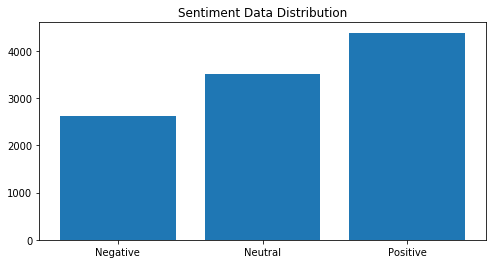

In [5]:
plt.figure(figsize=(8,4))
count_pos = df['Polarity'].value_counts()[1]
count_ntl = df['Polarity'].value_counts()[0]
count_neg = df['Polarity'].value_counts()[-1]

print('Positive:', count_pos, ',', 'Negative:', count_neg, ',', 'Neutral:', count_ntl)

plt.bar(['Negative', 'Neutral', 'Positive'], [count_neg, count_ntl, count_pos])
plt.title("Sentiment Data Distribution")

It's a very good dataset without any skewness. 

Now let us explore the data we hhave by checking a random sample.

In [6]:
import random
random_idx_list = [random.randint(1,len(df)) for i in range(10)] # creates random indexes to choose from dataframe
df.loc[random_idx_list,:].head(10) # Returns the rows with the index and display it

,Date,News,Polarity,Sentiment,neg,neu,pos,compound,Cum
8286,2020-03-26,Coronavirus: LHC issues guidelines for prisone...,-1,-1,0.195,0.769,0.036,-0.7506,-1
1265,2013-12-10,Shipping activity at Port Qasim - KARACHI: Two...,0,0,0.000,1.000,0.000,0.0000,0
3144,2016-02-03,Fazl threatens religious parties can derail go...,0,0,0.274,0.571,0.154,-0.2732,0
1640,2014-06-14,No special package for Karachi mega projects i...,0,0,0.185,0.588,0.227,0.1280,0
830,2012-12-18,Pakistan Stock outperforms among Global Market...,0,0,0.000,1.000,0.000,0.0000,0
10337,2020-12-30,Govt to register FIR against Mufti Kifayat: Ra...,0,0,0.000,1.000,0.000,0.0000,0
3868,2016-11-08,APCNGA to file petition with OGRA to settle CN...,1,1,0.000,0.918,0.082,0.3612,1
1234,2013-11-18,Thai economy grows 2.7pc in third quarter - BA...,0,0,0.000,1.000,0.000,0.0000,0
8889,2020-05-28,Japan outlines fresh stimulus package for viru...,1,1,0.054,0.787,0.160,0.5445,1
5017,2018-02-10,Moody's places GE ratings under review for dow...,1,1,0.000,0.912,0.088,0.3818,1


### Stemming/ Lematization
For grammatical reasons, documents are going to use different forms of a word, such as *write, writing and writes.* Additionally, there are families of derivationally related words with similar meanings. The goal of both stemming and lemmatization is to reduce inflectional forms and sometimes derivationally related forms of a word to a common base form.

Stemming usually refers to a process that chops off the ends of words in the hope of achieving goal correctly most of the time and often includes the removal of derivational affixes. 

Lemmatization usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base and dictionary form of a word
![Stemming and Lematization](https://qph.fs.quoracdn.net/main-qimg-cd7f4bafaa42639deb999b1580bea69f)

### Hyperlinks and Mentions
News may have tags and hyperlinks in them which may not come in our use so it is important to remove them.

### Stopwords
Stopwords are commonly used words in English which have no contextual meaning in an sentence. So therefore we remove them before classification. Some stopwords are...
![Stopwords English](https://4.bp.blogspot.com/-yiEr-jCVv38/Wmk10d84DYI/AAAAAAAAk0o/IfgjfjpgrxM5NosUQrGw7PtLvgr6DAG8ACLcBGAs/s1600/Screen%2BShot%2B2018-01-24%2Bat%2B5.41.21%2BPM.png)


**NLTK** is a python library which got functions to perform text processing task for NLP.



In [7]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [8]:
def preprocess(text, stem=False):
    text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

In [9]:
def preprocesser(df):
    df.text = df['News'].apply(lambda x: preprocess(x))
    return df

df = preprocesser(df)

C:\Users\CZ\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [10]:
df.tail()

,Date,News,Polarity,Sentiment,neg,neu,pos,compound,Cum
10510,2021-12-01,Court postpones Gilani's indictment till Febru...,0,0,0.07,0.930,0.000,-0.2732,0
10511,2021-12-01,Commissioner inaugurates anti-polio campaign -...,0,0,0.00,1.000,0.000,0.0000,0
10512,2021-12-01,Anti-polio campaign in full swing - Hussain in...,0,0,0.00,1.000,0.000,0.0000,0
10513,2021-12-01,Procurement of COVID vaccine will take some ti...,0,0,0.00,0.972,0.028,0.0772,0
10514,2021-12-01,Former model Frieha Altaf is the latest target...,0,0,0.00,1.000,0.000,0.0000,0




### Positive Words

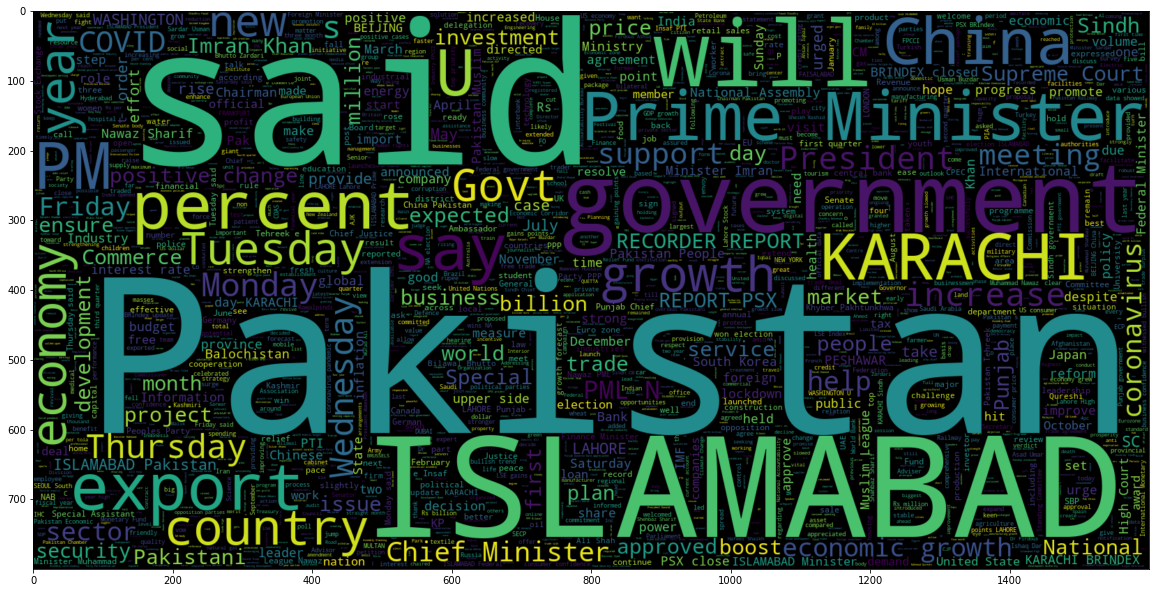

In [11]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20)) 

temp = df.sort_values(by=['Polarity'], ascending = False)
#print(temp[0:count_pos+4])
text = ' '.join(temp["News"][0:count_pos])


    
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(text)
plt.imshow(wc , interpolation = 'bilinear')

### Neutral Words

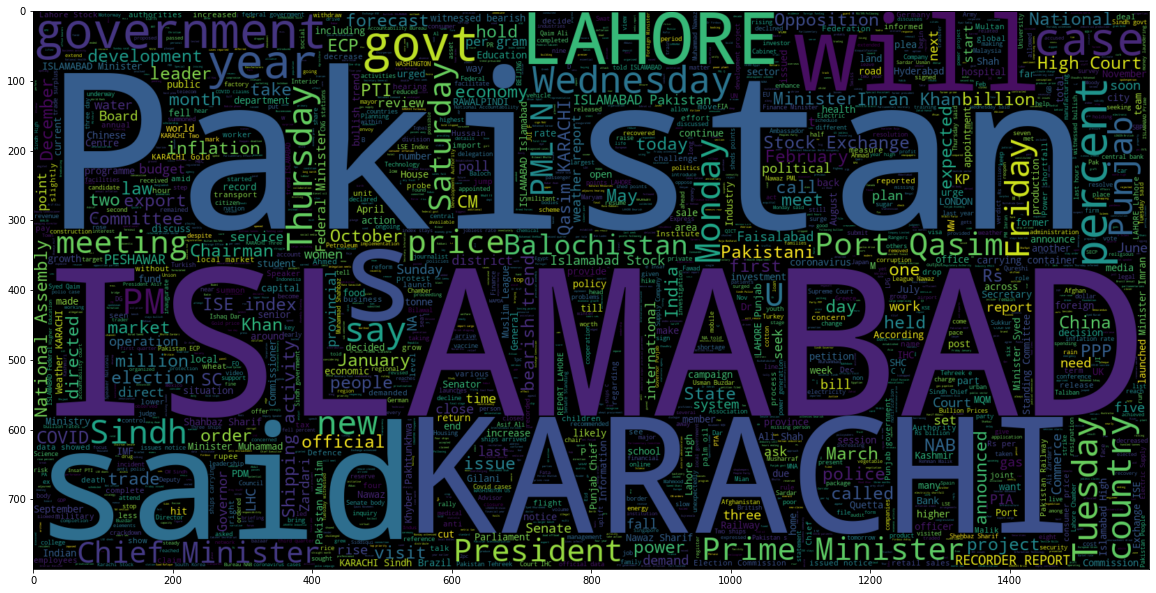

In [12]:
plt.figure(figsize = (20,20)) 
temp = df.sort_values(by=['Polarity'], ascending = False)
#print(temp[count_pos:count_pos + count_ntl])
text = ' '.join(temp["News"][count_pos:count_pos + count_ntl])


    
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(text)
plt.imshow(wc , interpolation = 'bilinear')

### Negative Words

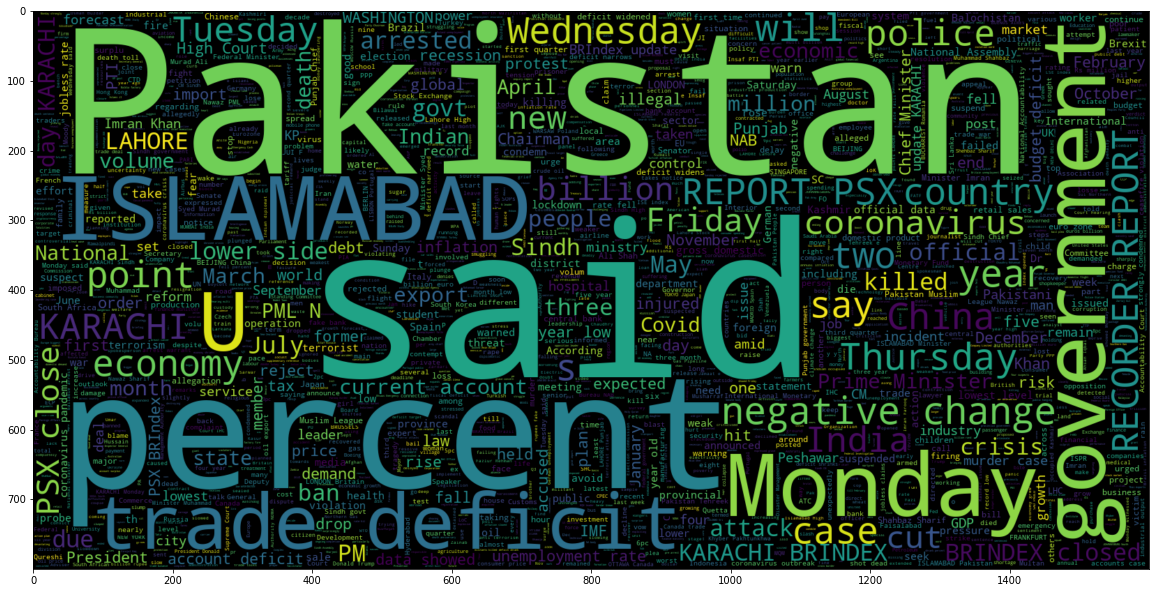

In [13]:
plt.figure(figsize = (20,20)) 
temp = df.sort_values(by=['Polarity'], ascending = False)
#print(temp[count_pos + count_ntl:])
text = ' '.join(temp["News"][count_pos + count_ntl:])


    
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(text)
plt.imshow(wc , interpolation = 'bilinear')

## Train and Test Split

We split our data in 2 sets, train consisting of 70% data and test consisting of 30% data.

In [14]:
TRAIN_SIZE = 0.3
MAX_NB_WORDS = 100000
MAX_SEQUENCE_LENGTH = 100

def _train_test_split(df, TRAIN_SIZE):
    
    train_data, dump = train_test_split(df, test_size=1-TRAIN_SIZE, random_state=7) # Splits Dataset into Training and Testing set
    test_data = df.iloc[int(len(df)*0.3):]
    
    return train_data, test_data

train_data, test_data = _train_test_split(df, TRAIN_SIZE)

In [15]:
print(train_data.shape, test_data.shape)

(3154, 9) (7361, 9)


`train_test_split` will shuffle the dataset and split it to gives training and testing dataset. It's important to shuffle our dataset before training.

In [16]:
train_data.describe()


,Polarity,Sentiment,neg,neu,pos,compound,Cum
count,3154.000000,3154.000000,3154.000000,3154.000000,3154.000000,3154.000000,3154.000000
mean,0.158529,0.158529,0.074951,0.832939,0.092104,0.081443,0.158529
std,0.792595,0.792595,0.121514,0.140209,0.108775,0.494268,0.792595
min,-1.000000,-1.000000,0.000000,0.194000,0.000000,-0.974700,-1.000000
25%,0.000000,0.000000,0.000000,0.754000,0.000000,-0.296000,0.000000
50%,0.000000,0.000000,0.000000,0.850000,0.069000,0.000000,0.000000
75%,1.000000,1.000000,0.130000,0.937750,0.155000,0.510600,1.000000
max,1.000000,1.000000,0.756000,1.000000,0.756000,0.955200,1.000000


# Tokenization


In [17]:
from keras.preprocessing.text import Tokenizer

def tokenize(train_data):
    
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(train_data['News'])

    word_index = tokenizer.word_index
    vocab_size = len(tokenizer.word_index) + 1
    return tokenizer, word_index, vocab_size

tokenizer, word_index, vocab_size = tokenize(train_data)
    

In [18]:
from keras.preprocessing.sequence import pad_sequences

def sequence_padder(train_data, MAX_SEQUENCE_LENGTH):

    x_train = pad_sequences(tokenizer.texts_to_sequences(train_data['News']),
                            maxlen = MAX_SEQUENCE_LENGTH)
    x_test = pad_sequences(tokenizer.texts_to_sequences(test_data['News']),
                           maxlen = MAX_SEQUENCE_LENGTH)
    
    return x_train, x_test

x_train, x_test = sequence_padder(train_data, MAX_SEQUENCE_LENGTH)

print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

Training X Shape: (3154, 100)
Testing X Shape: (7361, 100)


### Label Encoding 
We are building the model to predict class in enocoded form (0 or 1 as this is a binary classification). We should encode our training labels to encodings.

In [19]:
from keras.utils.np_utils import to_categorical

def encode_labels(train_data, test_data):
    
    train_labels = to_categorical(train_data['Polarity'], num_classes=3)
    test_labels = to_categorical(test_data['Polarity'], num_classes=3)
    #labels = np.argmax(labels, axis=1)
    y_train = train_labels
    y_test = test_labels
    return train_labels, test_labels, y_train, y_test

train_labels, test_labels, y_train, y_test = encode_labels(train_data, test_data)

# Word Emdedding


In [20]:
#!wget http://nlp.stanford.edu/data/glove.6B.zip
#!unzip glove.6B.zip


In [21]:
GLOVE_EMB = 'glove.6B.300d.txt'
EMBEDDING_DIM = 300
LR = 1e-3
BATCH_SIZE = 32
EPOCHS = 10
MODEL_PATH = 'best_model.hdf5'

In [22]:
embeddings_index = {}

f = open(GLOVE_EMB, encoding="utf8")
for line in f:
  values = line.split()
  word = value = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' %len(embeddings_index))

Found 400000 word vectors.


In [23]:
def embedder(EMBEDDING_DIM, vocab_size):
    embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
    for word, i in word_index.items():
      embedding_vector = embeddings_index.get(word)
      if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

    embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                              EMBEDDING_DIM,
                                              weights=[embedding_matrix],
                                              input_length=MAX_SEQUENCE_LENGTH,
                                              trainable=False)
    return embedding_layer

embedding_layer = embedder(EMBEDDING_DIM, vocab_size)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


# Model Training - BiDirectional LSTM and Single layer CNN


In [24]:
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential

In [25]:
def create_model(MAX_SEQUENCE_LENGTH, embedding_layer):
    
    sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
    embedding_sequences = embedding_layer(sequence_input)
    #x = Sequential()
    x = SpatialDropout1D(0.2)(embedding_sequences)
    x = Conv1D(64, 5)(x)
    x = Bidirectional(LSTM(32, dropout=0.2, recurrent_dropout=0.2))(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(512, activation='relu')(x)
    outputs = Dense(3, activation='sigmoid')(x)
    print(outputs)
    model = tf.keras.Model(sequence_input, outputs)
    
    return model

model = create_model(MAX_SEQUENCE_LENGTH, embedding_layer)

#plot_model(model)
print(model.summary())

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Tensor("dense_2/Sigmoid:0", shape=(?, 3), dtype=float32)
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 100, 300)          3200700   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 100, 300)          0    

The model has 1 embedding layer, 1 Convolutional 1D layer with 96,064 parameters, 1 BiDirectional LSTM layer with 24,832 parameters and 2 dense layers with 512 neurons, ReLU activation and 33,280 and 26,2656 parameters each. The final dense layer has 3 output dimensions (good, neutral, bad), Sigmoid activation with 1,539 parameters. There are several dropouts of 20% to ensure there is no overfitting. 

There are a total of 3,619,071 parameters of which 418,371 are trainable (LSTM and Dense).



### Callbacks


In [26]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

def compiler(model, LR):
    
    model.compile(optimizer=Adam(learning_rate=LR), loss='binary_crossentropy',
                  metrics=['acc'])
    ReduceLROnPlateau_ = ReduceLROnPlateau(factor=0.1,
                                         min_lr = 0.01,
                                         monitor = 'val_loss',
                                         verbose = 1)
    
    return model, ReduceLROnPlateau_

model, ReduceLROnPlateau_ = compiler(model, LR)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [27]:
def fit_model(model, x_train, y_train, BATCH_SIZE, EPOCHS, x_test, y_test):

    history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
                        validation_data=(x_test, y_test), callbacks=[ReduceLROnPlateau_], verbose = 0)
    
    return history

history = fit_model(model, x_train, y_train, BATCH_SIZE, EPOCHS, x_test, y_test)
    

In [28]:
import tensorflow.keras.models

model.save('temp.h5')
model = tf.keras.models.load_model('temp' + '.h5')


# Model Evaluation


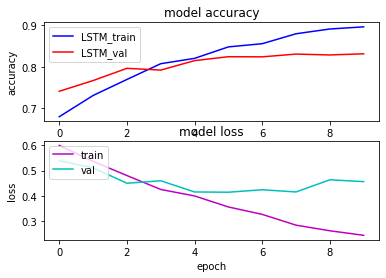

In [29]:
s, (at, al) = plt.subplots(2,1)
at.plot(history.history['acc'], c= 'b')
at.plot(history.history['val_acc'], c='r')
at.set_title('model accuracy')
at.set_ylabel('accuracy')
at.set_xlabel('epoch')
at.legend(['LSTM_train', 'LSTM_val'], loc='upper left')

al.plot(history.history['loss'], c='m')
al.plot(history.history['val_loss'], c='c')
al.set_title('model loss')
al.set_ylabel('loss')
al.set_xlabel('epoch')
al.legend(['train', 'val'], loc = 'upper left')

In [30]:
def decode_sentiment(score):
    if score[0] > score[1] and score[0] > score[2]:
        #print(score[0], '0\n---')
        return 0
    elif score[1] > score[0] and score[1] > score[2]:
        #print(score[1], '1\n---')
        return 1
    elif score[2] > score[0] and score[2] > score[1]:
        #print(score[2], '-1\n---')
        return -1

def sentiment_decoder(model, x_test):
    
    scores = model.predict(x_test, verbose=0, batch_size=10)
    y_pred_1d = [decode_sentiment(score) for score in scores]
    
    return scores, y_pred_1d

scores, y_pred_1d = sentiment_decoder(model, x_test)
    

In [31]:
len(y_pred_1d)

7361

### Confusion Matrix
Confusion Matrix provide a nice overlook at the model's performance in classification task

In [32]:
import itertools
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=13)
    plt.yticks(tick_marks, classes, fontsize=13)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=17)
    plt.xlabel('Predicted label', fontsize=17)

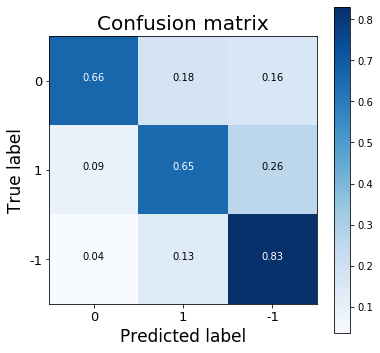

In [33]:
def cnf_plotter(test_data, y_pred_1d):

    cnf_matrix = confusion_matrix(test_data['Polarity'].to_list(), y_pred_1d)
    plt.figure(figsize=(6,6))
    plot_confusion_matrix(cnf_matrix, classes=test_data['Polarity'].unique(), title="Confusion matrix")
    plt.show()
    
cnf_plotter(test_data, y_pred_1d)

### Classification Scores

In [34]:
print(classification_report(list(test_data['Polarity']), y_pred_1d))

              precision    recall  f1-score   support

          -1       0.82      0.66      0.73      2010
           0       0.57      0.65      0.61      1694
           1       0.80      0.83      0.81      3657

    accuracy                           0.74      7361
   macro avg       0.73      0.72      0.72      7361
weighted avg       0.75      0.74      0.75      7361



### Run on 100 files

In [ ]:
KSE100 = pd.read_csv('Input/KSE100.csv')

for i in range(len(KSE100)):
    
    print('Iteration:', i)
    name = KSE100['Ticker'][i]
    print(name)
    load_name = 'Input/Cleaned Data' + name +'.csv'
    load_name_tech = 'Input/' + name +'.csv'
    
    df = load_data(load_name)
    df = preprocesser(df)
    
    train_data, test_data = _train_test_split(df, TRAIN_SIZE)
    tokenizer, word_index, vocab_size = tokenize(train_data)
    x_train, x_test = sequence_padder(train_data, MAX_SEQUENCE_LENGTH)
    train_label, test_labels, y_train, y_test = encode_labels(train_data, test_data)
    embedding_layer = embedder(EMBEDDING_DIM, vocab_size)
    
    model = create_model(MAX_SEQUENCE_LENGTH, embedding_layer)
    model, ReduceLROnPlateau_ = compiler(model, LR)
    history = fit_model(model, x_train, y_train, BATCH_SIZE, EPOCHS, x_test, y_test)
    
    model.save('Models/' + name + '.h5')
    model = tf.keras.models.load_model('Models/' + name + '.h5')
    
    scores, y_pred_1d = sentiment_decoder(model, x_test)
    
    cnf_plotter(test_data, y_pred_1d)
    print(classification_report(list(test_data['Polarity']), y_pred_1d))
    
    output = df.iloc[int(len(df)*TRAIN_SIZE):]
    output['Pred'] = y_pred_1d
    output = output.reset_index(drop=True)
    pred = pd.read_csv(load_name_tech)
    pred['Date'] = pd.to_datetime(pred['Date']) 
    start_date = output['Date'][0]
    end_date = pred['Date'][len(pred)-1]

    start = len(pred) - len(output)
    pred = pred.iloc[start:]
    #end = output.index[output['Date'] == end_date].to_list()[0]
    #output = output.iloc[:end]
    
    temp = output.groupby(['Date'], as_index = False).mean()

    pred['Score'] = [0 for i in range(len(pred))]

    for j in range(len(temp)):

        date = temp['Date'][j]

        index = pred.index[pred['Date'] == date]

        pred['Score'][index] = temp['Pred'][j]

    pred.to_csv(path_or_buf = 'Output/' + name + '.csv', index = False) #Save dataframe as CSV